In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_points_within_radius(center, radius, num_points):
    """Generates points within a specified radius of a center point."""
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = np.random.uniform(0, radius, num_points)
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    return np.column_stack((x, y))

In [5]:
def euclidean_distance(point1, point2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [ ]:
def k_means(data, k, max_iterations=100):
    """Implements the K-Means clustering algorithm."""
    num_samples, _ = data.shape
    
    centroids = data[np.random.choice(num_samples, k, replace=False)]
    
    for _ in range(max_iterations):

        # Assign each data point to the nearest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]

            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        
        # Update centroids
        for i in range(k):
            if clusters[i]:
                centroids[i] = np.mean(clusters[i], axis=0)
    
    return centroids, clusters

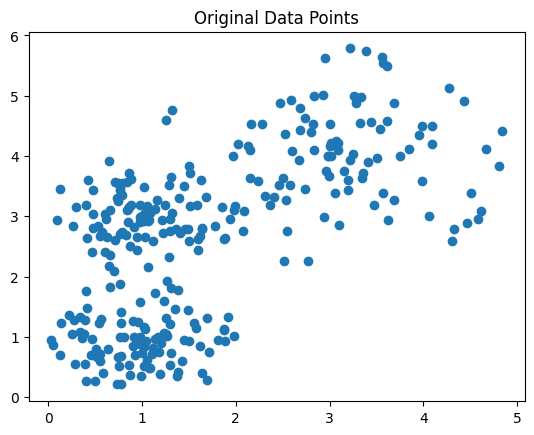

In [7]:
points1 = generate_points_within_radius((1, 1), 1, 100)
points2 = generate_points_within_radius((3, 4), 2, 100)
points3 = generate_points_within_radius((1, 3), 1, 100)
data = np.concatenate((points1, points2, points3))

plt.scatter(data[:, 0], data[:, 1])
plt.title("Original Data Points")
plt.show()

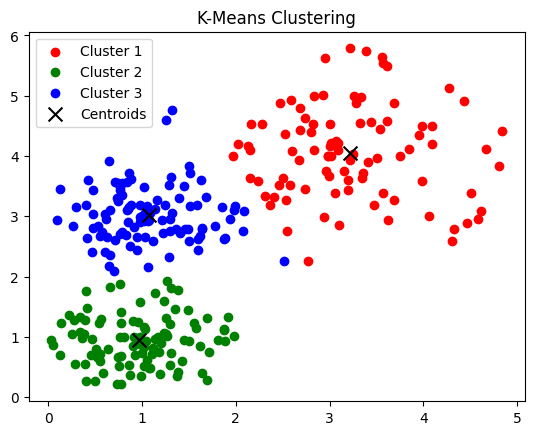

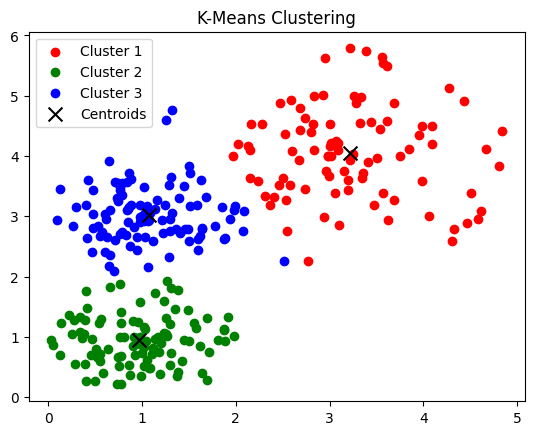

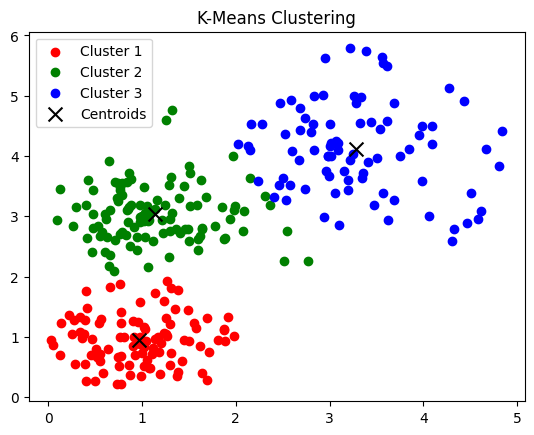

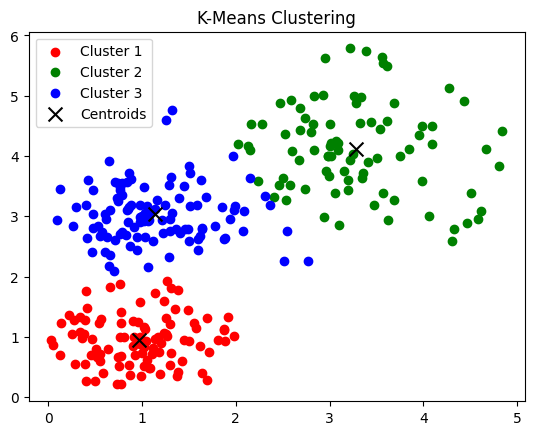

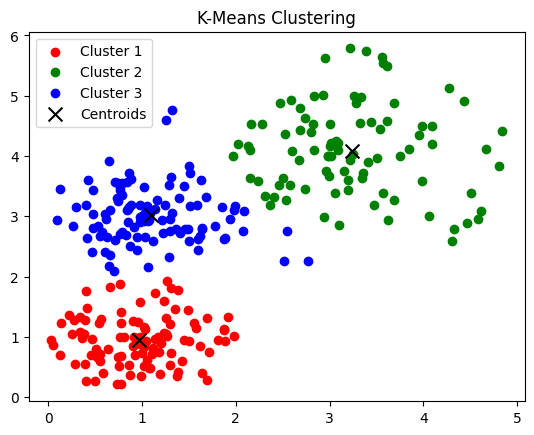

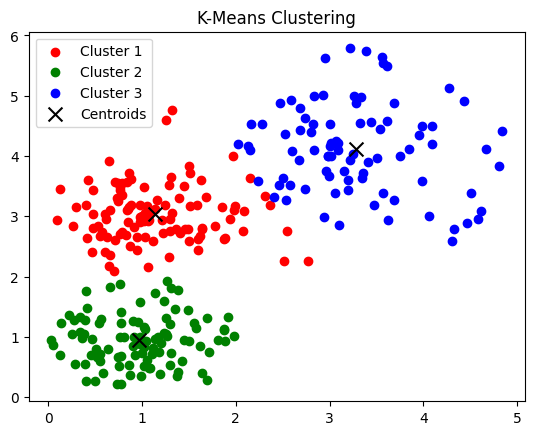

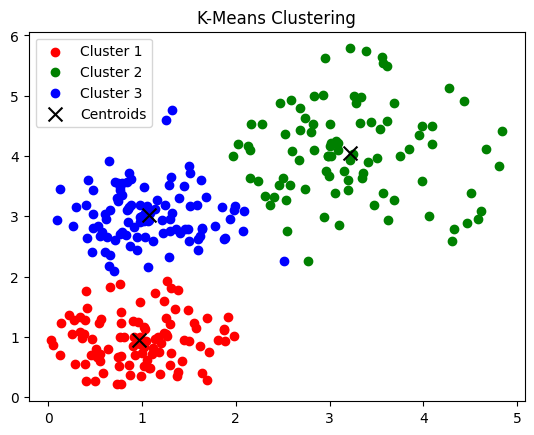

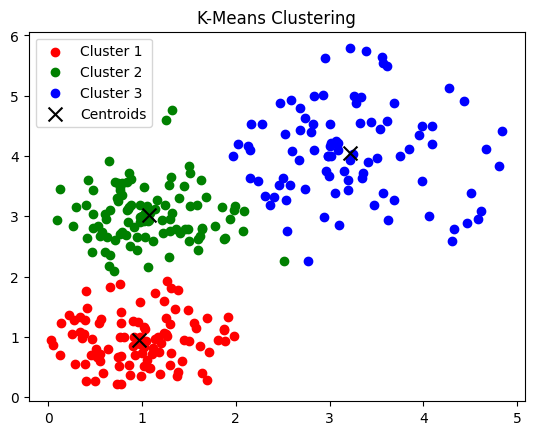

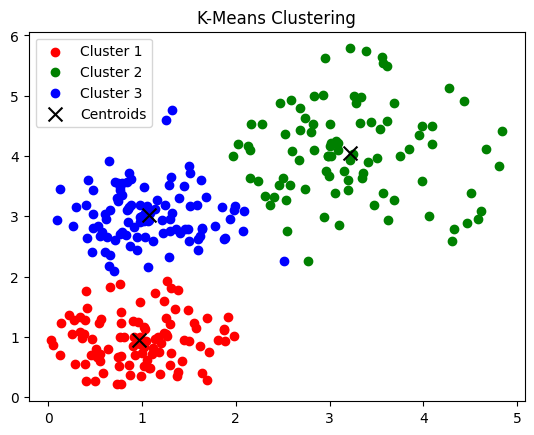

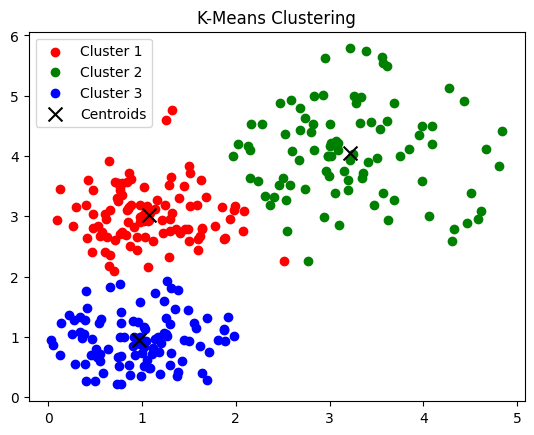

In [ ]:
for _ in range(10):
    centroids, clusters = k_means(data, 3)
    
    colors = ['r', 'g', 'b']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f"Cluster {i+1}")
    plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=100, c='k', label="Centroids")
    plt.title("K-Means Clustering")
    plt.legend()
    plt.show()